#Problem Statement

Bob has started his own mobile company. He wants to give tough fight to big companies like Apple,Samsung etc.
He does not know how to estimate the price of mobiles his company creates. In this competitive mobile phone market you cannot simply assume things. To solve this problem he collects sales data of mobile phones of various companies.
Bob wants to find out some relation between features of a mobile phone(eg:- RAM,Internal Memory etc) and its selling price. But he is not so good at Machine Learning. So he needs your help to solve this problem.
In this problem you do not have to predict actual price but a price range indicating how high the price is

#AIM
To Predict the price range of the mobile on the basis of the mobile specifications(Features):
d:ID
battery_power:Total energy a battery can store in one time measured in mAh
blue:Has bluetooth or not
clock_speed:speed at which microprocessor executes instructions
dual_sim:Has dual sim support or not
fc:Front Camera mega pixels
four_g:Has 4G or not
int_memory:Internal Memory in Gigabytes
m_dep:Mobile Depth in cm
mobile_wt:Weight of mobile phone
n_cores:Number of cores of processor
pc:Primary Camera mega pixels
px_height:Pixel Resolution Height
px_width:Pixel Resolution Width
ram:Random Access Memory in Megabytes
sc_h:Screen Height of mobile in cm
sc_w:Screen Width of mobile in cm
talk_time:longest time that a single battery charge will last when you are
three_g:Has 3G or not
touch_screen:Has touch screen or not
wifi:Has wifi or not

#Objective: 
This kind of prediction will help companies estimate price of mobiles to give tough competion to other mobile manufacturer
Also it will be usefull for Consumers to verify that they are paying best price for a mobile.
#Steps:
1. Data Preprocessing
2. Data Analysis & Visualization
3. Create and train following Models and find which models perform the best
> Linear Regression
> KNN
> Logistic Regression
> Decision tree
> Random forest

4. Predict the price range.


# Import Libraries

In [ ]:
import numpy as np   # To perform Linear algebra
import pandas as pd  # Used for File Handling



import seaborn as sns # used for data visualization
import matplotlib.pylab as plt
import matplotlib.cm as cm
import sklearn as skl
import plotly.express as px

from matplotlib.pyplot import figure


import sklearn.metrics as metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.tree import DecisionTreeClassifier 
from sklearn.linear_model import LassoCV,RidgeClassifier
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')
plt.ion


<function matplotlib.pyplot.ion()>

# Load Data

In [ ]:
# Import database (.csv) using Pandas Library
df_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset test.csv')

In [ ]:
#A tuple of array dimensions that tells the number of rows and columns of a given DataFrame
df_train.shape

(2000, 21)

In [ ]:
#View first 3 rows(default=5) with Headers from the training dataset to check whether data is loaded successfully or not and to check the headers
df_train.head(3)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2


Data loaded successfully : we can observe it in df_train.head()

# Data Analysis and PreProcessing

In [ ]:
# Print information about the Input training DataFrame
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [ ]:
#dDescription of the data in the DataFrame
df_train.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [ ]:
#Get the Unique Values from the dataframe to observe NA/0/Null values
df_train['battery_power'].unique()

array([ 842, 1021,  563, ..., 1139, 1467,  858])

In [ ]:
# Check Null Value again throughout the data
df_train.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [ ]:
## Print information about the Input testing DataFrame
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1000 non-null   int64  
 1   battery_power  1000 non-null   int64  
 2   blue           1000 non-null   int64  
 3   clock_speed    1000 non-null   float64
 4   dual_sim       1000 non-null   int64  
 5   fc             1000 non-null   int64  
 6   four_g         1000 non-null   int64  
 7   int_memory     1000 non-null   int64  
 8   m_dep          1000 non-null   float64
 9   mobile_wt      1000 non-null   int64  
 10  n_cores        1000 non-null   int64  
 11  pc             1000 non-null   int64  
 12  px_height      1000 non-null   int64  
 13  px_width       1000 non-null   int64  
 14  ram            1000 non-null   int64  
 15  sc_h           1000 non-null   int64  
 16  sc_w           1000 non-null   int64  
 17  talk_time      1000 non-null   int64  
 18  three_g  

In [ ]:
df_test.describe()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,500.500000,1248.510000,0.516000,1.540900,0.517000,4.593000,0.487000,33.652000,0.517500,139.51100,...,10.054000,627.121000,1239.774000,2138.998000,11.995000,5.316000,11.085000,0.756000,0.50000,0.507000
std,288.819436,432.458227,0.499994,0.829268,0.499961,4.463325,0.500081,18.128694,0.280861,34.85155,...,6.095099,432.929699,439.670981,1088.092278,4.320607,4.240062,5.497636,0.429708,0.50025,0.500201
min,1.000000,500.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.00000,...,0.000000,0.000000,501.000000,263.000000,5.000000,0.000000,2.000000,0.000000,0.00000,0.000000
25%,250.750000,895.000000,0.000000,0.700000,0.000000,1.000000,0.000000,18.000000,0.300000,109.75000,...,5.000000,263.750000,831.750000,1237.250000,8.000000,2.000000,6.750000,1.000000,0.00000,0.000000
50%,500.500000,1246.500000,1.000000,1.500000,1.000000,3.000000,0.000000,34.500000,0.500000,139.00000,...,10.000000,564.500000,1250.000000,2153.500000,12.000000,5.000000,11.000000,1.000000,0.50000,1.000000
75%,750.250000,1629.250000,1.000000,2.300000,1.000000,7.000000,1.000000,49.000000,0.800000,170.00000,...,16.000000,903.000000,1637.750000,3065.500000,16.000000,8.000000,16.000000,1.000000,1.00000,1.000000
max,1000.000000,1999.000000,1.000000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.00000,...,20.000000,1907.000000,1998.000000,3989.000000,19.000000,18.000000,20.000000,1.000000,1.00000,1.000000


In [ ]:
df_test.isnull().sum()

id               0
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64

### Observations Section 1: 
No outliers found 
No missing values present


# 2. Preprocessing 
Scaling

In [ ]:
#Scale each feature by its maximum absolute value
from sklearn.preprocessing import MaxAbsScaler
col = df_train.iloc[:,:20].columns
values = df_train.iloc[:,:20].values #returns a numpy array
scaler = MaxAbsScaler()
scaled_1 = scaler.fit_transform(values)
scaled = pd.DataFrame(scaled_1, columns=col)
scaled.head()


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,0.421421,0.0,0.733333,0.0,0.052632,0.0,0.109375,0.6,0.940,0.250,0.10,0.010204,0.378378,0.637569,0.473684,0.388889,0.95,0.0,0.0,1.0
1,0.511011,1.0,0.166667,1.0,0.000000,1.0,0.828125,0.7,0.680,0.375,0.30,0.461735,0.994995,0.658079,0.894737,0.166667,0.35,1.0,1.0,0.0
2,0.281782,1.0,0.166667,1.0,0.105263,1.0,0.640625,0.9,0.725,0.625,0.30,0.644388,0.858859,0.651076,0.578947,0.111111,0.45,1.0,1.0,0.0
3,0.307808,1.0,0.833333,0.0,0.000000,0.0,0.156250,0.8,0.655,0.750,0.45,0.620408,0.893894,0.692596,0.842105,0.444444,0.55,1.0,0.0,0.0
4,0.911411,1.0,0.400000,0.0,0.684211,1.0,0.687500,0.6,0.705,0.250,0.70,0.616327,0.606607,0.352926,0.421053,0.111111,0.75,1.0,1.0,0.0


In [ ]:
scaled['price_range'] = df_train['price_range']

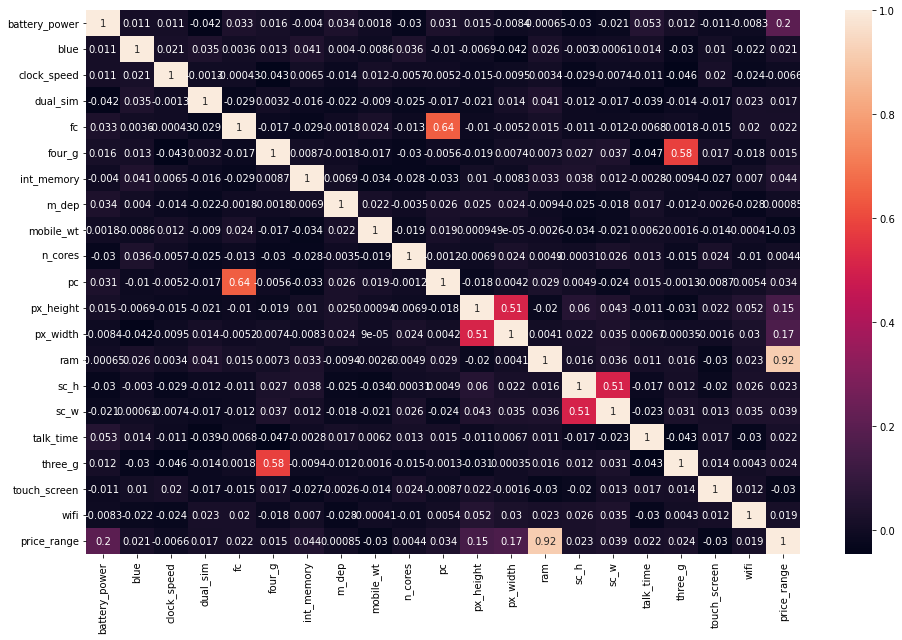

In [ ]:
corr_matrix = scaled.corr()
features = corr_matrix.index

plt.figure(figsize = [16,10])
sns.heatmap(scaled[features].corr(),annot = True)

In [ ]:
#using best 8 as per corr
#we are not considering the correlations between X features among themselves
corr = scaled.corr()
corr = corr.price_range
corr.sort_values(ascending = False)

price_range      1.000000
ram              0.917046
battery_power    0.200723
px_width         0.165818
px_height        0.148858
int_memory       0.044435
sc_w             0.038711
pc               0.033599
three_g          0.023611
sc_h             0.022986
fc               0.021998
talk_time        0.021859
blue             0.020573
wifi             0.018785
dual_sim         0.017444
four_g           0.014772
n_cores          0.004399
m_dep            0.000853
clock_speed     -0.006606
mobile_wt       -0.030302
touch_screen    -0.030411
Name: price_range, dtype: float64

Given Price Range has strong correlation with RAM.

Also
battery life,3G and 4G pc(Primary Camera mega pixels) and fc(Front Camera mega pixels)
px_weight(Pixel Resolution Width) and px_height(Pixel Resolution Height)
sc_w(Screen Width of mobile in cm) and sc_h(Screen Height of mobile in cm)
features have highly positive correlation. For example as long as sc_w (screen width of mobile) increase, sc_h(screen height of mobile) is increasing.

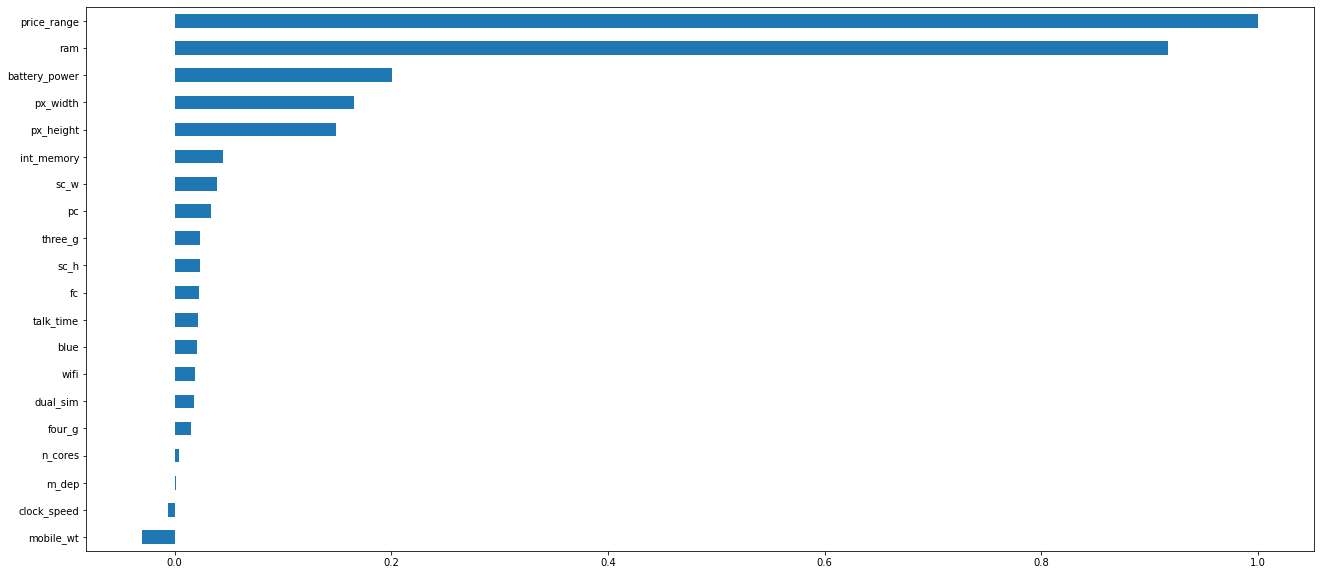

In [ ]:
fig = figure(figsize=(22,10))
corr.sort_values(ascending = True)[1:].plot(kind='barh');

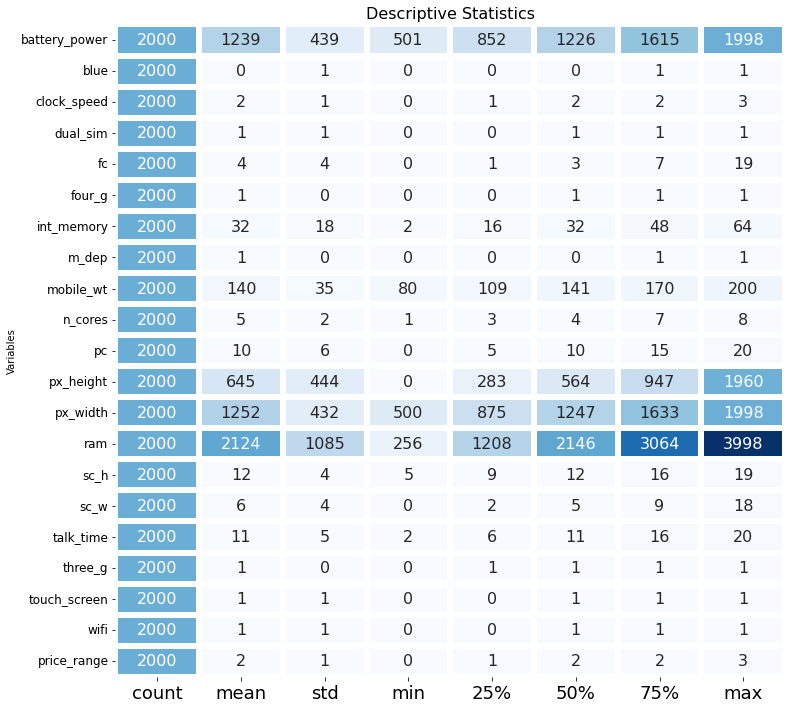

In [ ]:
desc = df_train.describe().T
df1 = pd.DataFrame(index=['battery_power', 'blue', 'clock_speed', 'dual_sim',
                          'fc', 'four_g', 'int_memory', 'm_dep', 'mobile_wt', 
                          'n_cores', 'pc', 'px_height', 'px_width', 'ram', 
                          'sc_h', 'sc_w', 'talk_time', 'three_g','touch_screen',
                          'wifi', 'price_range'], 
                   columns= ["count","mean","std","min",
                             "25%","50%","75%","max"], data= desc )

f,ax = plt.subplots(figsize=(12,12))

sns.heatmap(df1, annot=True,cmap = "Blues", fmt= '.0f',
            ax=ax,linewidths = 5, cbar = False,
            annot_kws={"size": 16})

plt.xticks(size = 18)
plt.yticks(size = 12, rotation = 0)
plt.ylabel("Variables")
plt.title("Descriptive Statistics", size = 16)
plt.show()

# Data Visualization & Feature Selection Methods

In [ ]:
#Histogram

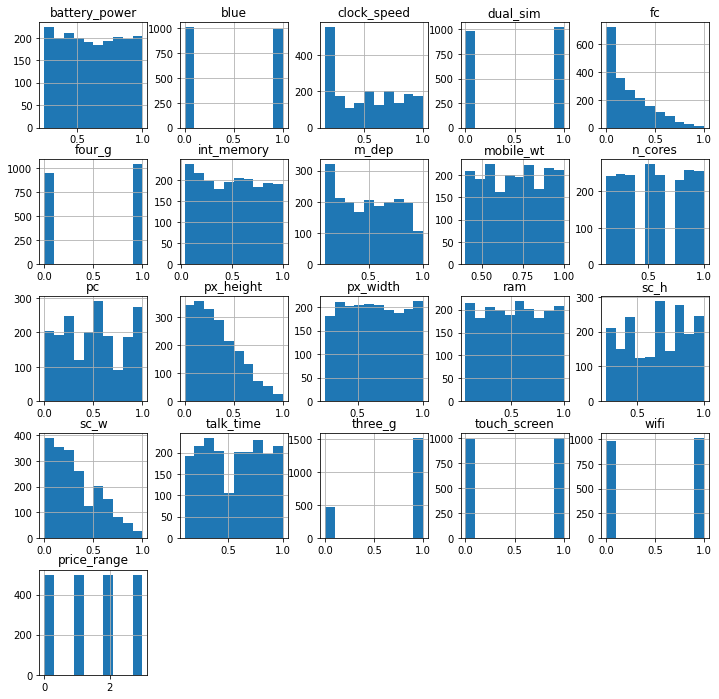

In [ ]:
scaled.hist(figsize=(12, 12));

In [ ]:
price_range = df_train["price_range"].value_counts()

fig = px.bar(price_range, y = 'price_range', text = 'price_range',
             
                    color = ["Price Range: 0","Price Range: 1",
                            "Price Range: 2","Price Range: 3"])
                    

fig.update_layout(title = "Price Range", showlegend = False,
                 xaxis = dict(zeroline = False, tickmode = 'linear', tick0 = 0, dtick = 1 ),
                 autosize=False,
                 width=700,
                 height=450,
                 xaxis_title_text = 'Price Range',
                 yaxis_title_text = 'Frequency')
                          
fig.show()

### Observation 2: Output Target(Price_Range) is perfectly balanced

## Feature Selection Processs


> RF Classifier

> Decision Tree

> Anova-f Test
Reference: M. Çetın and Y. Koç, "Mobile Phone Price Class Prediction Using Different Classification Algorithms with Feature Selection and Parameter Optimization," 2021 5th International Symposium on Multidisciplinary Studies and Innovative Technologies (ISMSIT), 2021, pp. 483-487, doi: 10.1109/ISMSIT52890.2021.9604550.
https://ieeexplore.ieee.org/document/9604550 






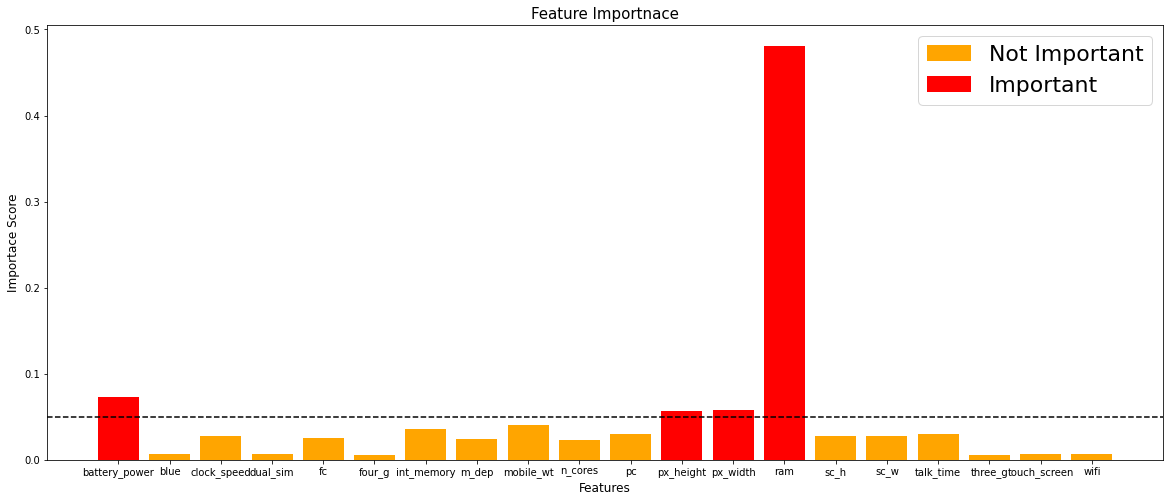

In [ ]:
# Splitting
#X_train, y_train = scaled, scaled['price_range']
X_train, y_train = df_train.drop(['price_range'], axis=1),df_train['price_range']
# Intializing Feature Selector
feature_selector = RandomForestClassifier()
feature_selector.fit(X_train,y_train)

# Potting Data
features = X_train.columns
feature_imps = feature_selector.feature_importances_
mean_imp = feature_imps.mean()

# Plotting
plt.figure(figsize=(20,8))
plt.title("Feature Importnace",fontsize=15)
plt.bar(features,feature_imps,color="orange",label="Not Important")
plt.bar(features[feature_imps>mean_imp],feature_imps[feature_imps>mean_imp],color="r",label="Important")
plt.axhline(mean_imp,color="k",linestyle="dashed")
plt.xlabel("Features",fontsize=12)
plt.ylabel("Importace Score",fontsize=12)
plt.legend(fontsize=22)
plt.show()

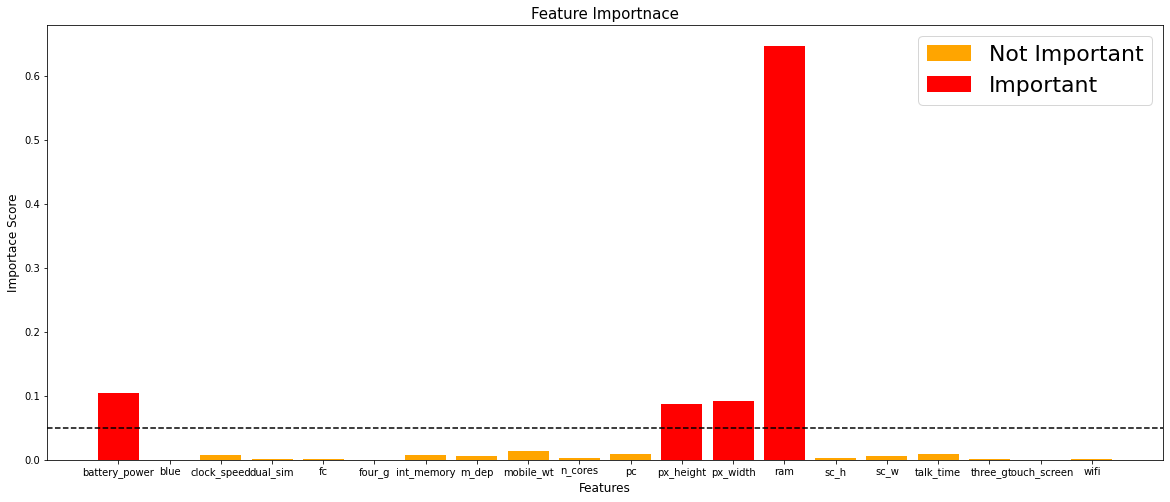

In [ ]:
  #Checking with Decision Tree 
from sklearn.tree import DecisionTreeClassifier 
model = DecisionTreeClassifier(criterion='gini')
model.fit(X_train , y_train)

feature_imp = pd.Series(model.feature_importances_ , index = X_train.columns)

mean_imp = feature_imps.mean()


# Plotting
plt.figure(figsize=(20,8))
plt.title("Feature Importnace",fontsize=15)
plt.bar(features,model.feature_importances_ ,color="orange",label="Not Important")
plt.bar(features[model.feature_importances_>mean_imp],model.feature_importances_ [feature_imps>mean_imp],color="r",label="Important")
plt.axhline(mean_imp,color="k",linestyle="dashed")
plt.xlabel("Features",fontsize=12)
plt.ylabel("Importace Score",fontsize=12)
plt.legend(fontsize=22)
plt.show()

('battery_power', 31.59815753989697)
('blue', 0.4767677091173118)
('clock_speed', 0.49370780102845274)
('dual_sim', 0.42823928557591956)
('fc', 0.7721819601853611)
('four_g', 1.0595245262724162)
('int_memory', 2.9229960794176044)
('m_dep', 1.5006824396684568)
('mobile_wt', 3.5943181851549952)
('n_cores', 2.6254151540861677)
('pc', 0.8254463576889531)
('px_height', 19.484841776704883)
('px_width', 22.62088249061287)
('ram', 3520.1108238957568)
('sc_h', 2.2259837359669037)
('sc_w', 1.6709998331676685)
('talk_time', 1.6288113087354124)
('three_g', 0.4573197497054951)
('touch_screen', 1.2933022318768157)
('wifi', 0.2849404695197208)


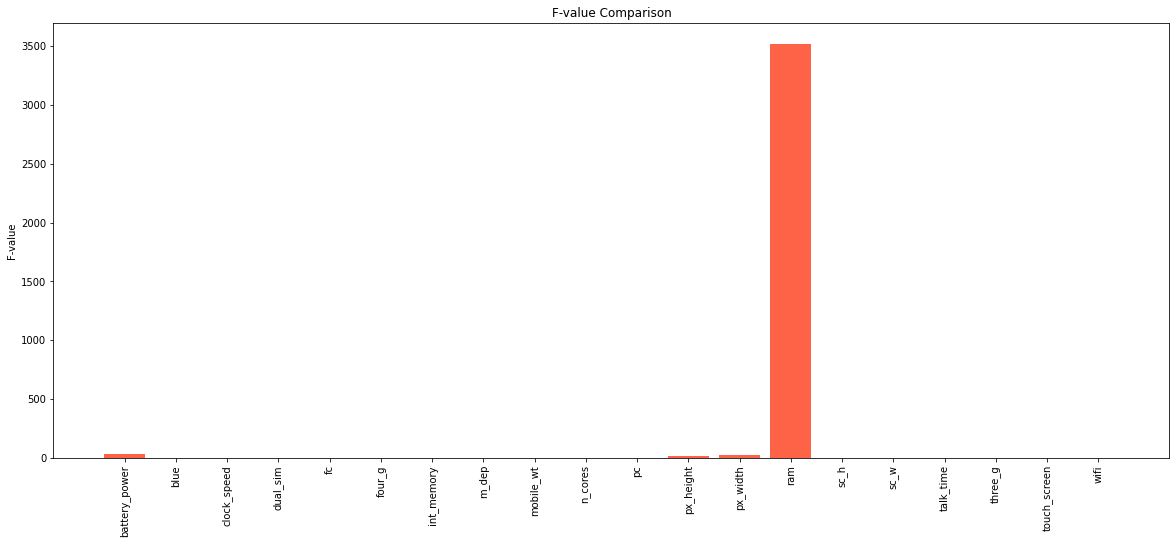

In [ ]:
#ANOVA-f Test
#ANOVA F-value method estimates the degree of linearity between the input feature (i.e., predictor) and the output feature. A high F-value indicates high degree of linearity and a low F-value indicates low degree of linearity. 
#Load Libraries
#from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif 
# Import f_classif from Scikit-learn
from sklearn.feature_selection import f_classif
# Create f_classif object to calculate F-value
f_value = f_classif(X_train, y_train)

# Print the name and F-value of each feature
for feature in zip(features, f_value[0]):
    print(feature)
# Create a bar chart for visualizing the F-values
plt.figure(figsize=(20,8))
plt.bar(x=features, height=f_value[0], color='tomato')
plt.xticks(rotation='vertical')
plt.ylabel('F-value')
plt.title('F-value Comparison')
plt.show()



In [ ]:
features

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')

In [ ]:
f_value

(array([3.15981575e+01, 4.76767709e-01, 4.93707801e-01, 4.28239286e-01,
        7.72181960e-01, 1.05952453e+00, 2.92299608e+00, 1.50068244e+00,
        3.59431819e+00, 2.62541515e+00, 8.25446358e-01, 1.94848418e+01,
        2.26208825e+01, 3.52011082e+03, 2.22598374e+00, 1.67099983e+00,
        1.62881131e+00, 4.57319750e-01, 1.29330223e+00, 2.84940470e-01]),
 array([5.94868828e-20, 6.98483110e-01, 6.86675162e-01, 7.32786931e-01,
        5.09504159e-01, 3.65155201e-01, 3.27769388e-02, 2.12459493e-01,
        1.31173907e-02, 4.89358505e-02, 4.79748902e-01, 1.88608480e-12,
        2.11691089e-14, 0.00000000e+00, 8.32499108e-02, 1.71214577e-01,
        1.80668647e-01, 7.12150681e-01, 2.75043308e-01, 8.36306962e-01]))

In [ ]:
scaled_copy = scaled.copy()

In [ ]:
#creating a new category to check if this fits within the best 8 features
scaled_copy['categorical'] = (scaled_copy["blue"].astype(bool) + \
                    scaled_copy["dual_sim"].astype(bool) + \
                    scaled_copy["four_g"].astype(bool) + \
                    scaled_copy["three_g"].astype(bool) + \
                    scaled_copy["touch_screen"].astype(bool) + \
                    scaled_copy["wifi"].astype(bool))

In [ ]:
scaled_copy = scaled_copy[['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'categorical','price_range' ]]
scaled_copy.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,categorical,price_range
0,0.421421,0.0,0.733333,0.0,0.052632,0.0,0.109375,0.6,0.940,0.250,...,0.378378,0.637569,0.473684,0.388889,0.95,0.0,0.0,1.0,True,1
1,0.511011,1.0,0.166667,1.0,0.000000,1.0,0.828125,0.7,0.680,0.375,...,0.994995,0.658079,0.894737,0.166667,0.35,1.0,1.0,0.0,True,2
2,0.281782,1.0,0.166667,1.0,0.105263,1.0,0.640625,0.9,0.725,0.625,...,0.858859,0.651076,0.578947,0.111111,0.45,1.0,1.0,0.0,True,2
3,0.307808,1.0,0.833333,0.0,0.000000,0.0,0.156250,0.8,0.655,0.750,...,0.893894,0.692596,0.842105,0.444444,0.55,1.0,0.0,0.0,True,2
4,0.911411,1.0,0.400000,0.0,0.684211,1.0,0.687500,0.6,0.705,0.250,...,0.606607,0.352926,0.421053,0.111111,0.75,1.0,1.0,0.0,True,1


In [ ]:
scaled_copy.categorical = scaled_copy.categorical.astype(bool)

In [ ]:
scaled_copy.categorical

0       True
1       True
2       True
3       True
4       True
        ... 
1995    True
1996    True
1997    True
1998    True
1999    True
Name: categorical, Length: 2000, dtype: bool

In [ ]:
scaled_copy.categorical.unique()

array([ True, False])

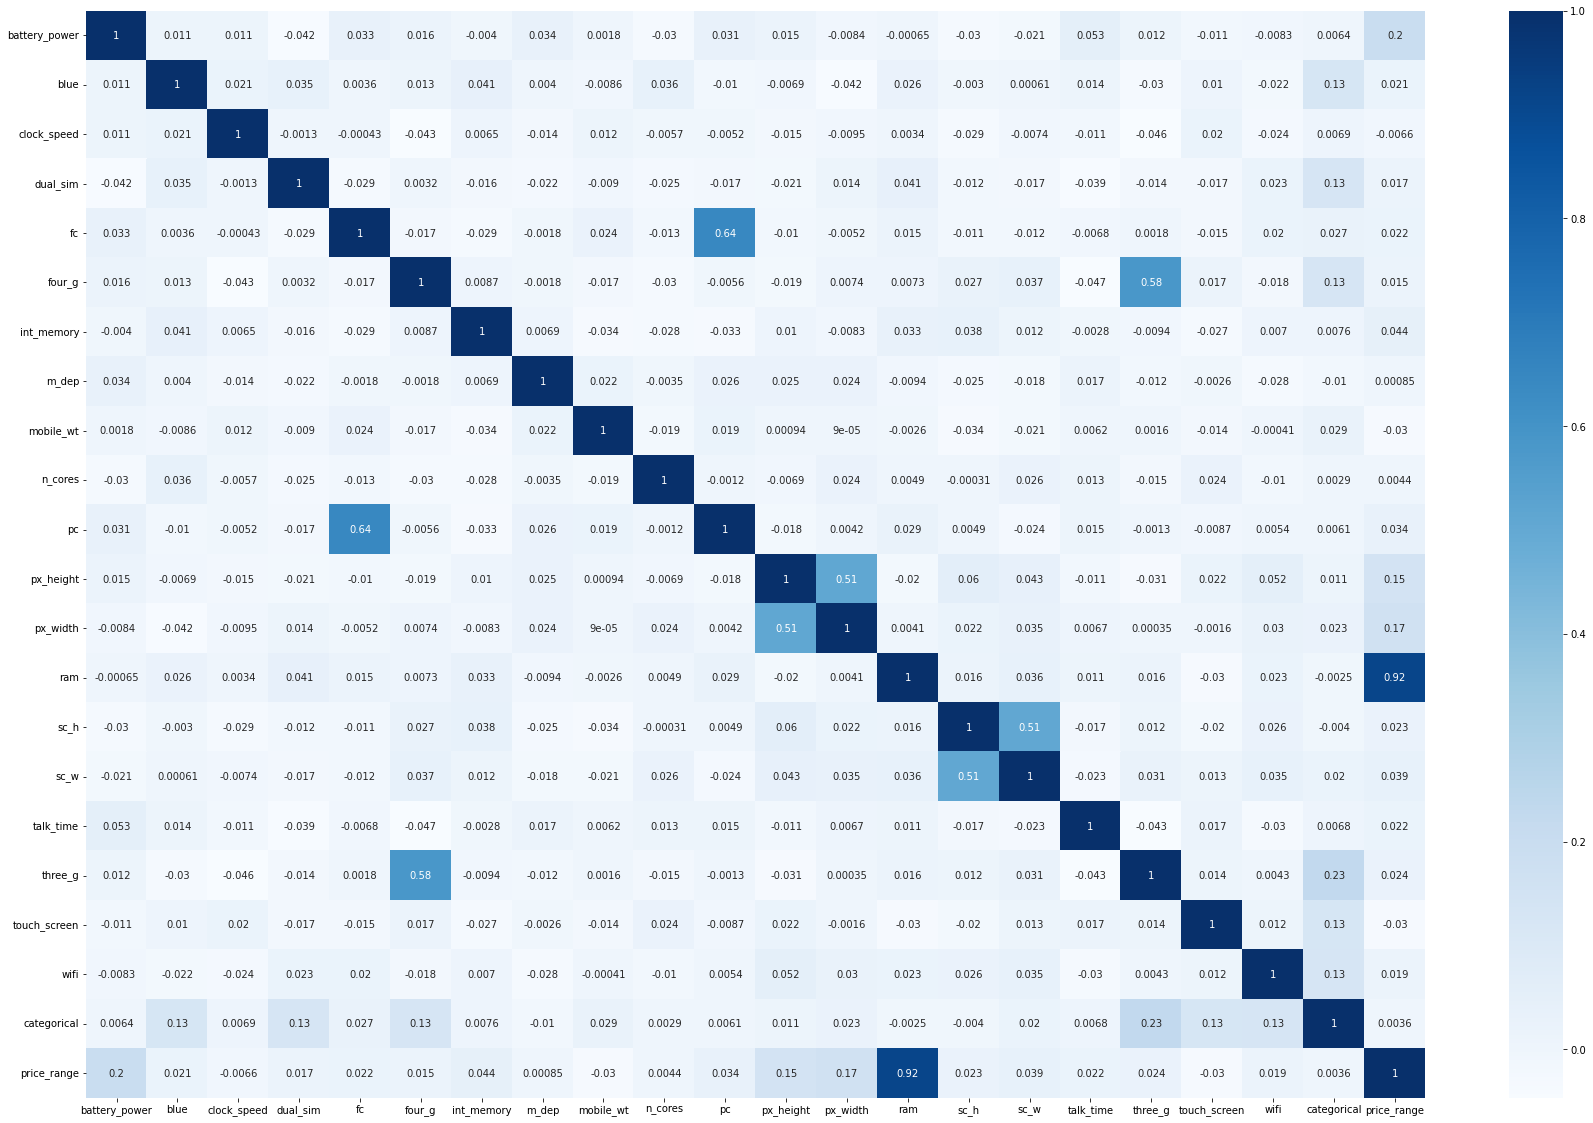

In [ ]:
#we see that categorical doesn't make much sense
plt.figure(figsize=(30,20))
sns.heatmap(scaled_copy.corr(),annot=True,cmap=cm.Blues);


## #so we donot use scaled_copy anymore

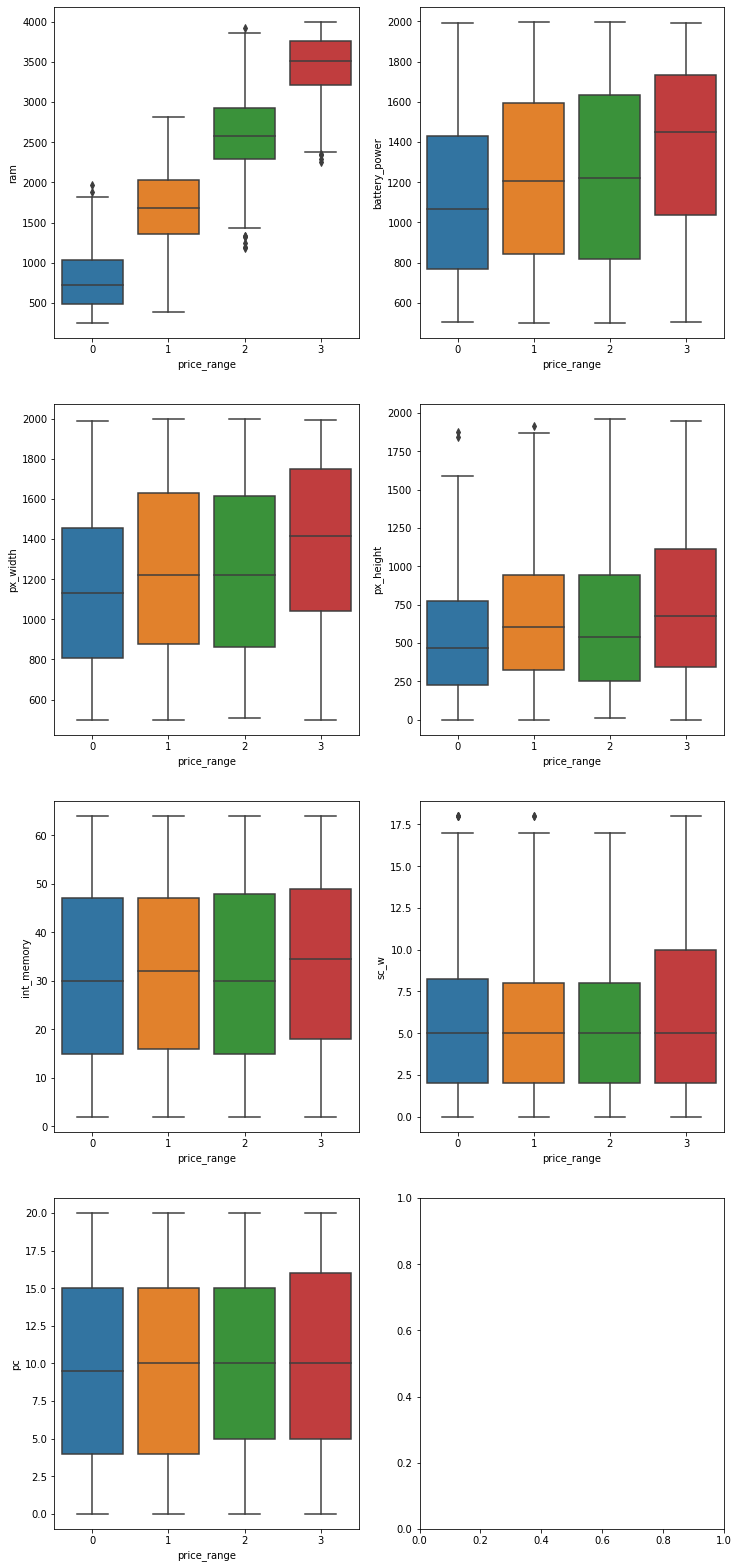

In [ ]:

#EDA for the 8 features that we saw on Random Forest
fig, ax = plt.subplots(ncols=2, nrows=4, figsize=(12,28))
scaled['price_range'] = df_train['price_range']
sns.boxplot(x='price_range',y='ram',data=df_train,ax=ax[0,0]);
sns.boxplot(x='price_range',y='battery_power',data=df_train,ax=ax[0,1]);
sns.boxplot(x='price_range',y='px_width',data=df_train,ax=ax[1,0]);
sns.boxplot(x='price_range',y='px_height',data=df_train,ax=ax[1,1]);
sns.boxplot(x='price_range',y='int_memory',data=df_train,ax=ax[2,0]);
sns.boxplot(x='price_range',y='sc_w',data=df_train,ax=ax[2,1]);
sns.boxplot(x='price_range',y='pc',data=df_train,ax=ax[3,0]);



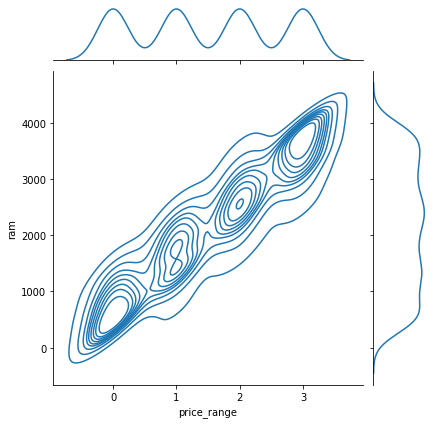

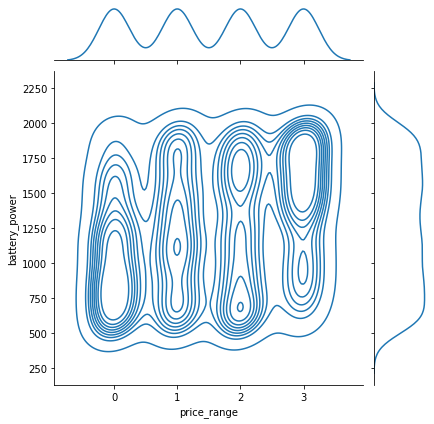

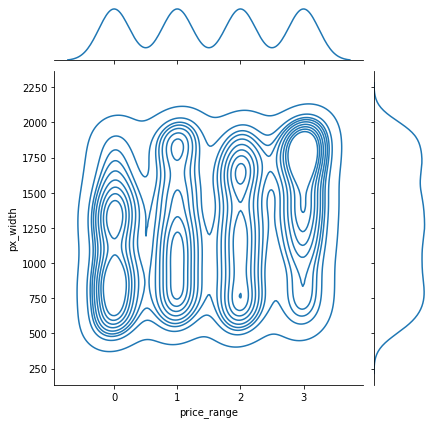

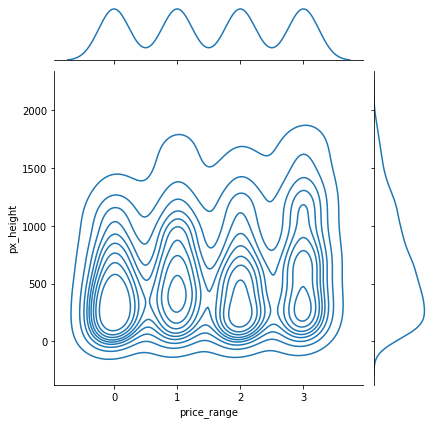

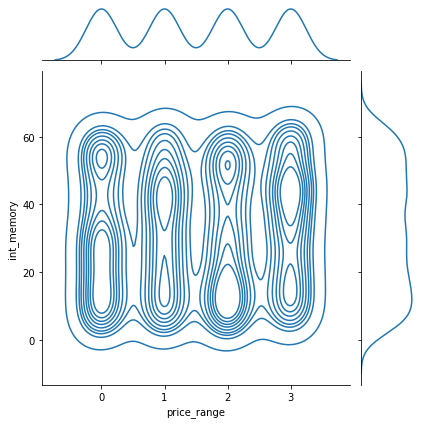

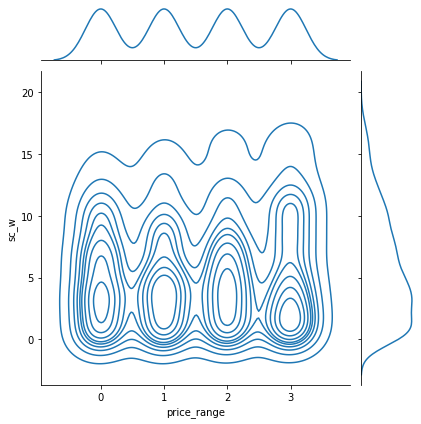

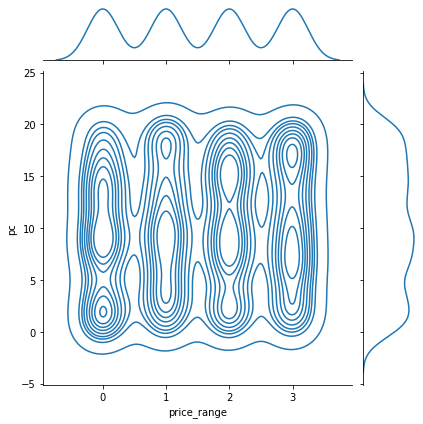

In [ ]:
#We check for the same 7 features with jointplot to see the distribution concentration per price range
#fig, ax = plt.subplots(ncols=2, nrows=4, figsize=(12,28))
sns.jointplot(x='price_range',y= 'ram',data=df_train, ax=ax[0,0],kind='kde');
sns.jointplot(x='price_range',y='battery_power',data=df_train,ax=ax[0,1],kind='kde')
sns.jointplot(x='price_range',y='px_width',data=df_train,ax=ax[1,0],kind='kde');
sns.jointplot(x='price_range',y='px_height',data=df_train,ax=ax[1,1],kind='kde');
sns.jointplot(x='price_range',y='int_memory',data=df_train,ax=ax[2,0],kind='kde');
sns.jointplot(x='price_range',y='sc_w',data=df_train,ax=ax[2,1],kind='kde');
sns.jointplot(x='price_range',y='pc',data=df_train,ax=ax[3,0],kind='kde');

In [ ]:
#Now we try creating different band groups for the top 7 features that we found through correlation matrix to check the percent distribution of price_range 
df_train_copy = df_train.copy()

In [ ]:
pd.cut(df_train_copy.ram,5).unique()

[(2501.2, 3249.6], (1004.4, 1752.8], (252.258, 1004.4], (3249.6, 3998.0], (1752.8, 2501.2]]
Categories (5, interval[float64, right]): [(252.258, 1004.4] < (1004.4, 1752.8] < (1752.8, 2501.2] <
                                           (2501.2, 3249.6] < (3249.6, 3998.0]]

In [ ]:
#we get the ranges as above and now we proceed to create bands for the other 6 features
pd.cut(df_train_copy.px_height,5).unique()
pd.cut(df_train_copy.battery_power,5).unique()
pd.cut(df_train_copy.px_width,5).unique()
pd.cut(df_train_copy.int_memory,5).unique()
pd.cut(df_train_copy.sc_w,5).unique()
pd.cut(df_train_copy.pc,5).unique()
#ram
df_train_copy.loc[df_train_copy['ram'] <= 1004.4, 'ram'] = 0
df_train_copy.loc[(df_train_copy['ram'] > 1004.4) & (df_train_copy['ram'] <= 1752.8), 'ram'] = 1
df_train_copy.loc[(df_train_copy['ram'] > 1752.8) & (df_train_copy['ram'] <= 2501.2), 'ram'] = 2
df_train_copy.loc[(df_train_copy['ram'] > 2501.2) & (df_train_copy['ram'] <= 3249.6), 'ram'] = 3
df_train_copy.loc[df_train_copy['ram'] > 3249.6 , 'ram'] = 4

#pixel_height
df_train_copy.loc[df_train_copy['px_height'] <= 392.0, 'px_height'] = 0
df_train_copy.loc[(df_train_copy['px_height'] > 392.0) & (df_train_copy['px_height'] <= 784.0), 'px_height'] = 1
df_train_copy.loc[(df_train_copy['px_height'] > 784.0) & (df_train_copy['px_height'] <= 1176.0), 'px_height']   = 2
df_train_copy.loc[(df_train_copy['px_height'] > 1176.0) & (df_train_copy['px_height'] <= 1568.0), 'px_height'] = 3
df_train_copy.loc[df_train_copy['px_height'] > 1568.0 , 'px_height'] = 4

#battery_power
df_train_copy.loc[df_train_copy['battery_power'] <= 800.4, 'battery_power'] = 0
df_train_copy.loc[(df_train_copy['battery_power'] > 800.4) & (df_train_copy['battery_power'] <= 1099.8), 'battery_power'] = 1
df_train_copy.loc[(df_train_copy['battery_power'] > 1099.8) & (df_train_copy['battery_power'] <= 1399.2), 'battery_power']   = 2
df_train_copy.loc[(df_train_copy['battery_power'] > 1399.2) & (df_train_copy['battery_power'] <= 1698.6), 'battery_power'] = 3
df_train_copy.loc[df_train_copy['battery_power'] > 1698.6 , 'battery_power'] = 4

#pixel_width
df_train_copy.loc[df_train_copy['px_width'] <= 799.6, 'px_width'] = 0
df_train_copy.loc[(df_train_copy['px_width'] > 799.6) & (df_train_copy['px_width'] <= 1099.2), 'px_width'] = 1
df_train_copy.loc[(df_train_copy['px_width'] > 1099.2) & (df_train_copy['px_width'] <= 1398.8), 'px_width']   = 2
df_train_copy.loc[(df_train_copy['px_width'] > 1398.8) & (df_train_copy['px_width'] <= 1698.4), 'px_width'] = 3
df_train_copy.loc[df_train_copy['px_width'] > 1698.4 , 'px_width'] = 4

#internal_memory
df_train_copy.loc[df_train_copy['int_memory'] <= 14.4, 'int_memory'] = 0
df_train_copy.loc[(df_train_copy['int_memory'] > 14.4) & (df_train_copy['int_memory'] <= 26.8), 'int_memory'] = 1
df_train_copy.loc[(df_train_copy['int_memory'] > 26.8) & (df_train_copy['int_memory'] <= 39.2), 'int_memory']   = 2
df_train_copy.loc[(df_train_copy['int_memory'] > 39.2) & (df_train_copy['int_memory'] <= 51.6), 'int_memory'] = 3
df_train_copy.loc[df_train_copy['int_memory'] > 51.6 , 'int_memory'] = 4

#screen_width
df_train_copy.loc[df_train_copy['sc_w'] <= 3.6, 'sc_w'] = 0
df_train_copy.loc[(df_train_copy['sc_w'] > 3.6) & (df_train_copy['sc_w'] <= 7.2), 'sc_w'] = 1
df_train_copy.loc[(df_train_copy['sc_w'] > 7.2) & (df_train_copy['sc_w'] <= 10.8), 'sc_w']   = 2
df_train_copy.loc[(df_train_copy['sc_w'] > 10.8) & (df_train_copy['sc_w'] <= 14.4), 'sc_w'] = 3
df_train_copy.loc[df_train_copy['sc_w'] > 14.4 , 'sc_w'] = 4

#primary_camera
df_train_copy.loc[df_train_copy['pc'] <= 4.0, 'pc'] = 0
df_train_copy.loc[(df_train_copy['pc'] > 4.0) & (df_train_copy['pc'] <= 8.0), 'pc'] = 1
df_train_copy.loc[(df_train_copy['pc'] > 8.0) & (df_train_copy['pc'] <= 12.0), 'pc']   = 2
df_train_copy.loc[(df_train_copy['pc'] > 12.0) & (df_train_copy['pc'] <= 16.0), 'pc'] = 3
df_train_copy.loc[df_train_copy['pc'] > 16.0 , 'pc'] = 4

In [ ]:
(df_train_copy[df_train_copy.price_range == 0].ram.value_counts() * 100)/(df_train_copy[df_train_copy.price_range == 0]).ram.count()
#from the data we can see: in price_range -> 0, 73% of the mobile handsets have Ram memory in range 0 which is less than 1000.4 MB
#likewise we see the distribution through a countplot for other price ranges

0    73.0
1    26.4
2     0.6
Name: ram, dtype: float64

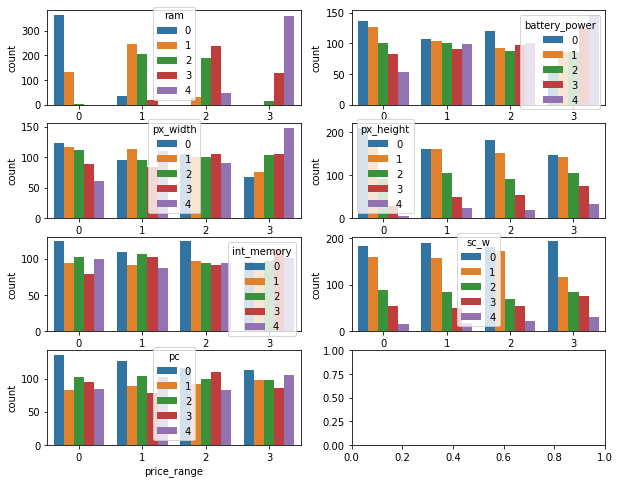

In [ ]:
fig, ax = plt.subplots(ncols=2, nrows=4, figsize=(10,8))

sns.countplot(data=df_train_copy,x='price_range',hue='ram',ax=ax[0,0])
sns.countplot(data=df_train_copy,x='price_range',hue='battery_power',ax=ax[0,1])
sns.countplot(data=df_train_copy,x='price_range',hue='px_width',ax=ax[1,0])
sns.countplot(data=df_train_copy,x='price_range',hue='px_height',ax=ax[1,1])
sns.countplot(data=df_train_copy,x='price_range',hue='int_memory',ax=ax[2,0])
sns.countplot(data=df_train_copy,x='price_range',hue='sc_w',ax=ax[2,1])
sns.countplot(data=df_train_copy,x='price_range',hue='pc',ax=ax[3,0])

In [ ]:
#Finding the mean values per price range and features - so as to have the mean of the handsets per price_range and per feature_range
df_train_copy['ram_actual'] = df_train.ram
df_train_copy['battery_power_actual'] = df_train.battery_power
df_train_copy['px_width_actual'] = df_train.px_width
df_train_copy['px_height_actual'] = df_train.px_height
df_train_copy['int_memory_actual'] = df_train.int_memory
df_train_copy['sc_w_actual'] = df_train.sc_w
df_train_copy['pc_actual'] = df_train.pc

In [ ]:
df_train_copy[['ram','ram_actual','price_range']].head(10)


,ram,ram_actual,price_range
0,3,2549,1
1,3,2631,2
2,3,2603,2
3,3,2769,2
4,1,1411,1
5,1,1067,1
6,3,3220,3
7,0,700,0
8,1,1099,0
9,0,513,0


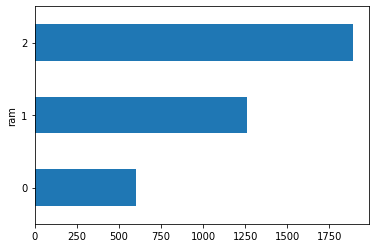

In [ ]:
df_train_copy[(df_train_copy.price_range == 0)].groupby('ram').ram_actual.mean().plot(kind='barh')

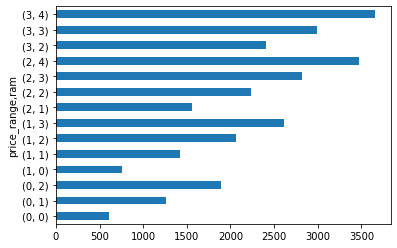

In [ ]:
df_train_copy.groupby(['price_range','ram']).ram_actual.mean()
df_train_copy.groupby(['price_range','ram']).ram_actual.mean().plot(kind='barh');

In [ ]:
#from sklearn.metrics import accuracy_score
#from sklearn.preprocessing import StandardScaler
#ss=StandardScaler()
#X1_train=ss.fit_transform(X=X_train) #scaling the features matrix

In [ ]:
#X1_train.shape

### Observation 3:
mobile depth < 0.1cm , Pixel height < 10 , Screen width > 15 cm and < 1cm practically not possible.

# Model Implementation 

In [ ]:
#from sklearn.metrics import accuracy_score
#from sklearn.preprocessing import StandardScaler
#ss=StandardScaler()
#X1=ss.fit_transform(X=X_train) #scaling the features matrix

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_train,y_train,test_size=0.3)

In [ ]:
#confusion matrix
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
def my_confusion_matrix(y_test, y_pred, plt_title):
    cm=confusion_matrix(y_test, y_pred)
    print(classification_report(y_test, y_pred))
    sns.heatmap(cm, annot=True, fmt='g', cbar=False, cmap='BuPu')
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    plt.title(plt_title)
    plt.show()
    return cm

**Linear Regression Model**

coefficient of determination: 0.9181472534154513


0.9191929994461505

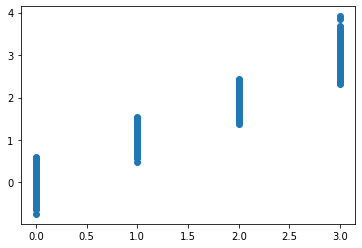

In [ ]:
from sklearn.linear_model import LinearRegression

lmodel = LinearRegression()
lmodel.fit(X_train,y_train)
r_sq = lmodel.score(X_train,y_train)
print(f"coefficient of determination: {r_sq}")
y_train_pred = lmodel.predict(X_train)
#print(f"predicted response:\n{y_train_pred}")
y_test_pred = lmodel.predict(X_test)
#print(f"predicted response:\n{y_test_pred}")
plt.scatter(y_test,y_test_pred)
lmodel.score(X_test,y_test)

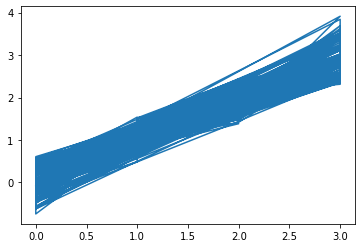

In [ ]:
plt.plot(y_test,y_test_pred)

**KNN**

KNN Classifier Accuracy Score:  0.44047619047619047
              precision    recall  f1-score   support

           0       0.50      0.72      0.59       107
           1       0.30      0.32      0.31       100
           2       0.25      0.25      0.25        91
           3       0.78      0.43      0.56       122

    accuracy                           0.44       420
   macro avg       0.46      0.43      0.43       420
weighted avg       0.48      0.44      0.44       420



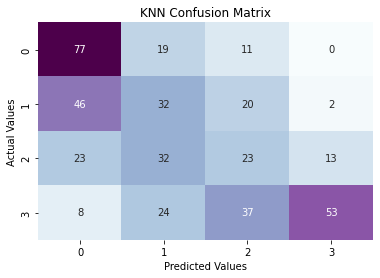

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3,leaf_size=25)
knn.fit(X_train, y_train)
y_pred_knn=knn.predict(X_test)
print('KNN Classifier Accuracy Score: ',accuracy_score(y_test,y_pred_knn))
cm_rfc=my_confusion_matrix(y_test, y_pred_knn, 'KNN Confusion Matrix')





In [ ]:
knn.score(X_test,y_test)

0.46

In [ ]:
#Elbow Method For optimum value of K
error_rate = []
for i in range(1,20):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

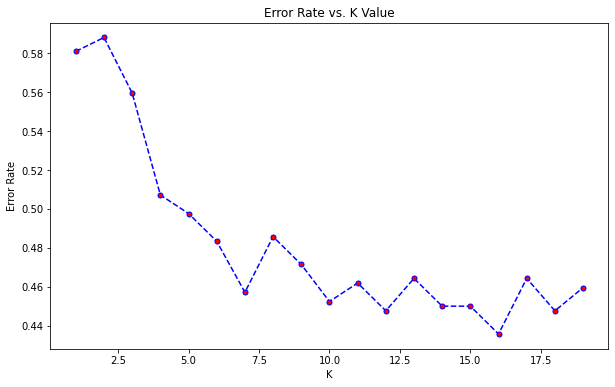

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,20),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=5)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Train Set Accuracy:65.51020408163265
Test Set Accuracy:54.047619047619044
              precision    recall  f1-score   support

           0       0.73      0.76      0.74       103
           1       0.48      0.45      0.47       106
           2       0.51      0.32      0.39       146
           3       0.45      0.85      0.59        65

    accuracy                           0.54       420
   macro avg       0.54      0.59      0.55       420
weighted avg       0.55      0.54      0.53       420



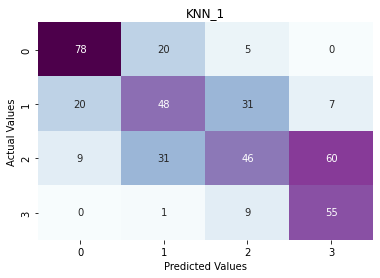


Confusion Matrix:
[[78 20  5  0]
 [20 48 31  7]
 [ 9 31 46 60]
 [ 0  1  9 55]]


In [ ]:
Train_pred = knn.predict(X_train)
Test_pred = knn.predict(X_test)
print("Train Set Accuracy:"+str(accuracy_score(Train_pred,y_train)*100))
print("Test Set Accuracy:"+str(accuracy_score(Test_pred,y_test)*100))
print("\nConfusion Matrix:\n%s"%my_confusion_matrix(Test_pred,y_test,'KNN_1'))

Train Set Accuracy:97.24489795918367
Test Set Accuracy:95.95238095238095
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       111
           1       0.94      0.94      0.94       100
           2       0.92      0.93      0.93        90
           3       0.97      0.99      0.98       119

    accuracy                           0.96       420
   macro avg       0.96      0.96      0.96       420
weighted avg       0.96      0.96      0.96       420



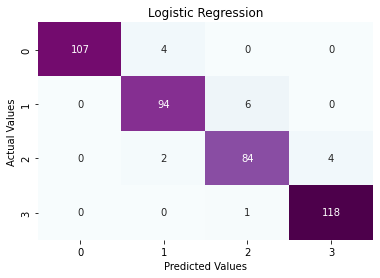


Confusion Matrix:
[[107   4   0   0]
 [  0  94   6   0]
 [  0   2  84   4]
 [  0   0   1 118]]


In [ ]:
### Logistic Regression ###


model = LogisticRegression()
model.fit(X_train,y_train)
y_train_pred = model.predict(X_train)
ylr_test_pred = model.predict(X_test)


print("Train Set Accuracy:"+str(accuracy_score(y_train_pred,y_train)*100))
print("Test Set Accuracy:"+str(accuracy_score(ylr_test_pred,y_test)*100))
print("\nConfusion Matrix:\n%s"%my_confusion_matrix(ylr_test_pred,y_test,'Logistic Regression'))

Train Set Accuracy:100.0
Test Set Accuracy:82.5
              precision    recall  f1-score   support

           0       0.94      0.90      0.92       154
           1       0.79      0.83      0.81       145
           2       0.73      0.75      0.74       151
           3       0.85      0.83      0.84       150

    accuracy                           0.82       600
   macro avg       0.83      0.82      0.83       600
weighted avg       0.83      0.82      0.83       600



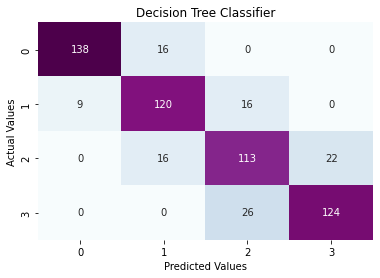


Confusion Matrix:
[[138  16   0   0]
 [  9 120  16   0]
 [  0  16 113  22]
 [  0   0  26 124]]


In [ ]:

#Decision Tree Classifier classifier
model = DecisionTreeClassifier()
model.fit(X_train,y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)


print("Train Set Accuracy:"+str(accuracy_score(y_train_pred,y_train)*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test_pred,y_test)*100))
print("\nConfusion Matrix:\n%s"%my_confusion_matrix(y_test_pred,y_test,'Decision Tree Classifier'))

#As it is Seen,Decision tree overfits the data, resulting in pretty low test accuracy

Train Set Accuracy:99.79591836734694
Test Set Accuracy:80.0
              precision    recall  f1-score   support

           0       0.93      0.82      0.87       121
           1       0.67      0.70      0.68        96
           2       0.73      0.69      0.71        95
           3       0.85      0.96      0.90       108

    accuracy                           0.80       420
   macro avg       0.79      0.79      0.79       420
weighted avg       0.80      0.80      0.80       420



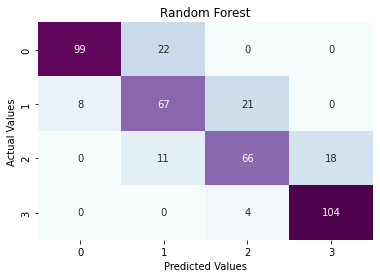


Confusion Matrix:
[[ 99  22   0   0]
 [  8  67  21   0]
 [  0  11  66  18]
 [  0   0   4 104]]


In [ ]:
#Random Forest Classifier
param_grid={"criterion":['gini','entropy'],"n_estimators":[8,10,12]}
model = RandomForestClassifier()
model1 = GridSearchCV(model,n_jobs=-1,param_grid=param_grid)
model1.fit(X_train,y_train)
y_train_pred = model1.predict(X_train)
y_test_pred = model1.predict(X_test)


print("Train Set Accuracy:"+str(accuracy_score(y_train_pred,y_train)*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test_pred,y_test)*100))
print("\nConfusion Matrix:\n%s"%my_confusion_matrix(y_test_pred,y_test, 'Random Forest'))

### Observation 4: Logistic Regression performs better than other classifiers(95.95% Accuracy). Randof Forest and Decition Tree classifiers are getting overfitted.

In [ ]:
ylr_test_pred

array([0, 3, 1, 3, 3, 1, 3, 2, 0, 3, 3, 2, 2, 3, 2, 0, 2, 2, 1, 2, 1, 3,
       3, 3, 3, 0, 2, 1, 3, 2, 1, 1, 2, 2, 1, 0, 0, 1, 2, 3, 0, 2, 3, 2,
       2, 0, 3, 3, 0, 1, 3, 0, 0, 1, 3, 0, 1, 3, 0, 0, 0, 3, 1, 0, 3, 2,
       0, 3, 2, 1, 2, 2, 1, 0, 0, 1, 3, 3, 3, 0, 0, 0, 0, 3, 3, 1, 0, 2,
       3, 0, 1, 1, 0, 0, 3, 3, 3, 2, 2, 1, 0, 2, 2, 0, 2, 1, 3, 2, 0, 1,
       1, 1, 1, 1, 1, 3, 3, 3, 0, 3, 3, 2, 2, 0, 3, 1, 0, 0, 3, 1, 3, 2,
       0, 0, 2, 3, 0, 1, 3, 3, 1, 3, 1, 0, 0, 0, 0, 1, 0, 3, 0, 0, 0, 0,
       3, 3, 3, 1, 3, 2, 3, 1, 2, 3, 2, 0, 2, 2, 3, 2, 1, 2, 0, 1, 1, 3,
       2, 3, 1, 0, 3, 2, 0, 3, 3, 1, 3, 3, 2, 2, 1, 2, 3, 3, 0, 3, 2, 1,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 2, 3, 3, 2, 1, 2, 1, 0, 0, 1, 0, 0, 0,
       0, 2, 3, 3, 0, 3, 2, 1, 3, 1, 1, 2, 1, 1, 0, 3, 1, 3, 1, 2, 3, 0,
       0, 1, 2, 2, 3, 2, 3, 1, 0, 1, 1, 1, 2, 3, 3, 0, 0, 2, 1, 2, 3, 2,
       1, 0, 0, 0, 1, 3, 3, 0, 3, 2, 0, 0, 3, 0, 0, 0, 0, 2, 2, 0, 3, 1,
       2, 1, 3, 3, 3, 1, 3, 3, 0, 1, 1, 0, 0, 3, 1,